# CSE 578: Data Visualization Project
## Sahil Yogesh Hadke | shadke1@asu.edu | 1229679960

### Import Statements

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Read input

In [72]:
# Define the headers based on your provided structure
headers = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

df = pd.read_csv('./data/adult.data', header=None, names=headers) 

In [26]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
df.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

### Data Preprocessing

In [106]:
# drop columns which are not relevant
df = df.drop(['education-num'], axis=1)

In [73]:
# Remove ? (NaN)
df.replace(' ?', np.nan, inplace=True)
df = df.dropna()

df.count()

### Export to Excel for better understanding and exploring

In [5]:
df.to_csv("./data/data.csv")

### Heatmap

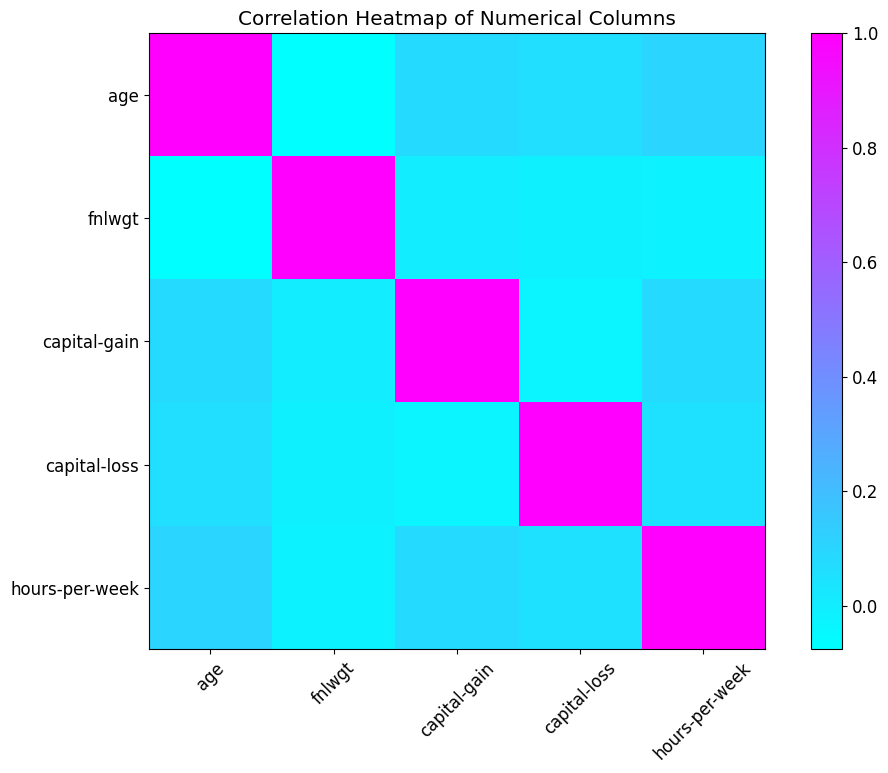

In [113]:
# Selecting numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='cool', interpolation='nearest')
plt.colorbar()
plt.title('Correlation Heatmap of Numerical Columns')
plt.xticks(np.arange(len(numerical_cols)), numerical_cols, rotation=45)
plt.yticks(np.arange(len(numerical_cols)), numerical_cols)
plt.show()

### User Story 1 (Univariate)
#### Age vs income and hours per week vs income

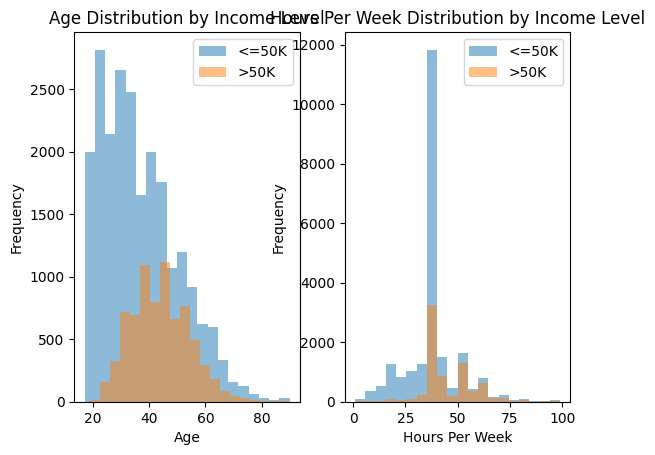

In [31]:
# Age Income Analysis
income_low = df[df['income'] == ' <=50K']
income_high = df[df['income'] == ' >50K']

# Create a figure and axis
fig, ax = plt.subplots(1,2)

# Plot the histograms for both income levels
ax[0].hist(income_low['age'], bins=20, alpha=0.5, label='<=50K')
ax[0].hist(income_high['age'], bins=20, alpha=0.5, label='>50K')

# Add labels and title
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Age Distribution by Income Level')
ax[0].legend()


# Plot the histograms for both income levels
ax[1].hist(income_low['hours-per-week'], bins=20, alpha=0.5, label='<=50K')
ax[1].hist(income_high['hours-per-week'], bins=20, alpha=0.5, label='>50K')

# Add labels and title
ax[1].set_xlabel('Hours Per Week')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Hours Per Week Distribution by Income Level')
ax[1].legend()


# Show the plot
plt.show()

### User Story 2 (Univariate)
#### Workclass and Income

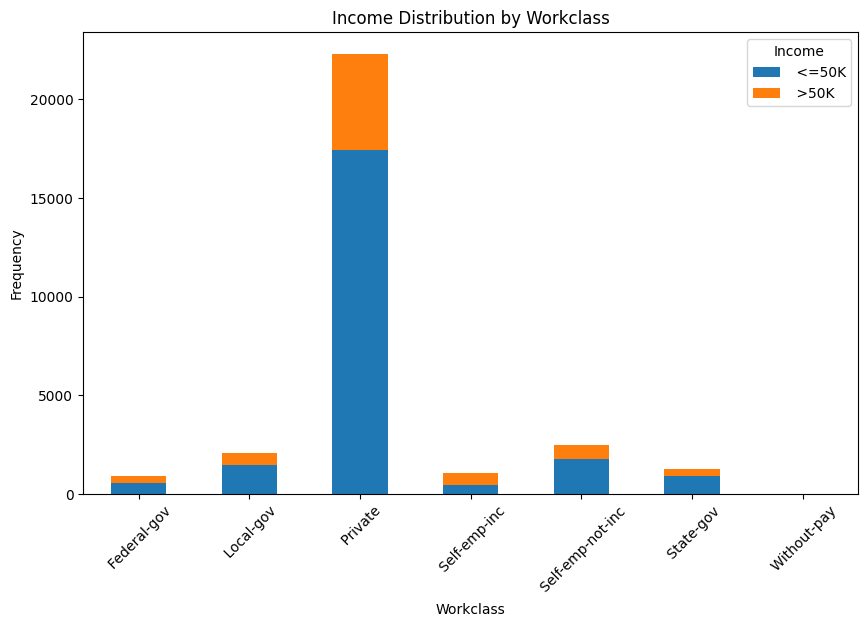

In [32]:
# Create a cross-tabulation of workclass and income
workclass_income_ct = pd.crosstab(df['workclass'], df['income'])

# Plotting
workclass_income_ct.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Income Distribution by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()

### User Story 3 (Univariate)
#### Marital Status and Income

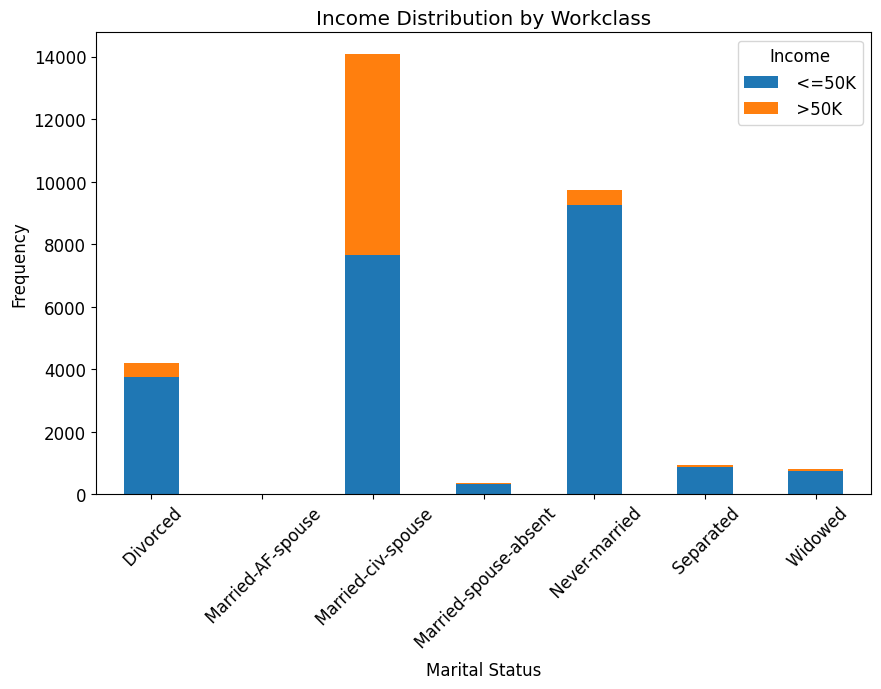

In [63]:
# Create a cross-tabulation of workclass and income
workclass_income_ct = pd.crosstab(df['marital-status'], df['income'])

# Plotting
workclass_income_ct.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('Income Distribution by Workclass')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()

### User Story 4 (Multivariate)
#### Age, Hours Per week Vs. Income

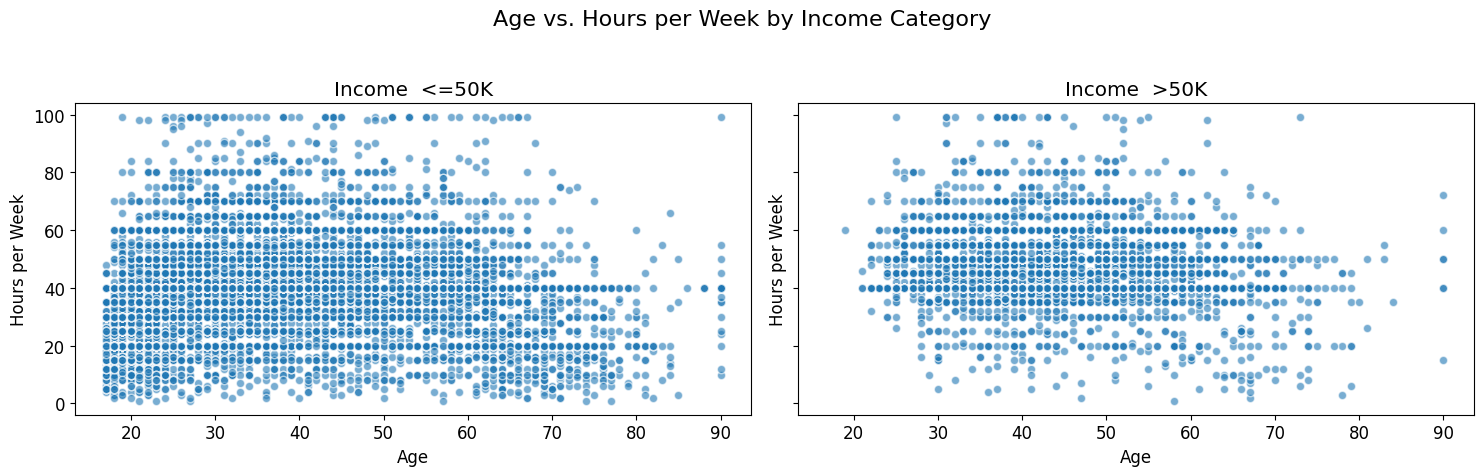

In [65]:
# Unique income categories
income_categories = df['income'].unique()

# Setting up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=len(income_categories), figsize=(15, 5), sharey=True, sharex=True)

for ax, category in zip(axes, income_categories):
    # Filter data by income
    subset = df[df['income'] == category]
    
    # Scatter plot for age vs hours-per-week
    sc = ax.scatter(subset['age'], subset['hours-per-week'], label=f'Income {category}', alpha=0.6, edgecolor='w')
    
    ax.set_title(f'Income {category}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Hours per Week')

# Add a general title
plt.suptitle('Age vs. Hours per Week by Income Category', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust subplots to fit suptitle
plt.show()

### User Story 5 (Multivariate)
#### Race, Sex Vs. Income

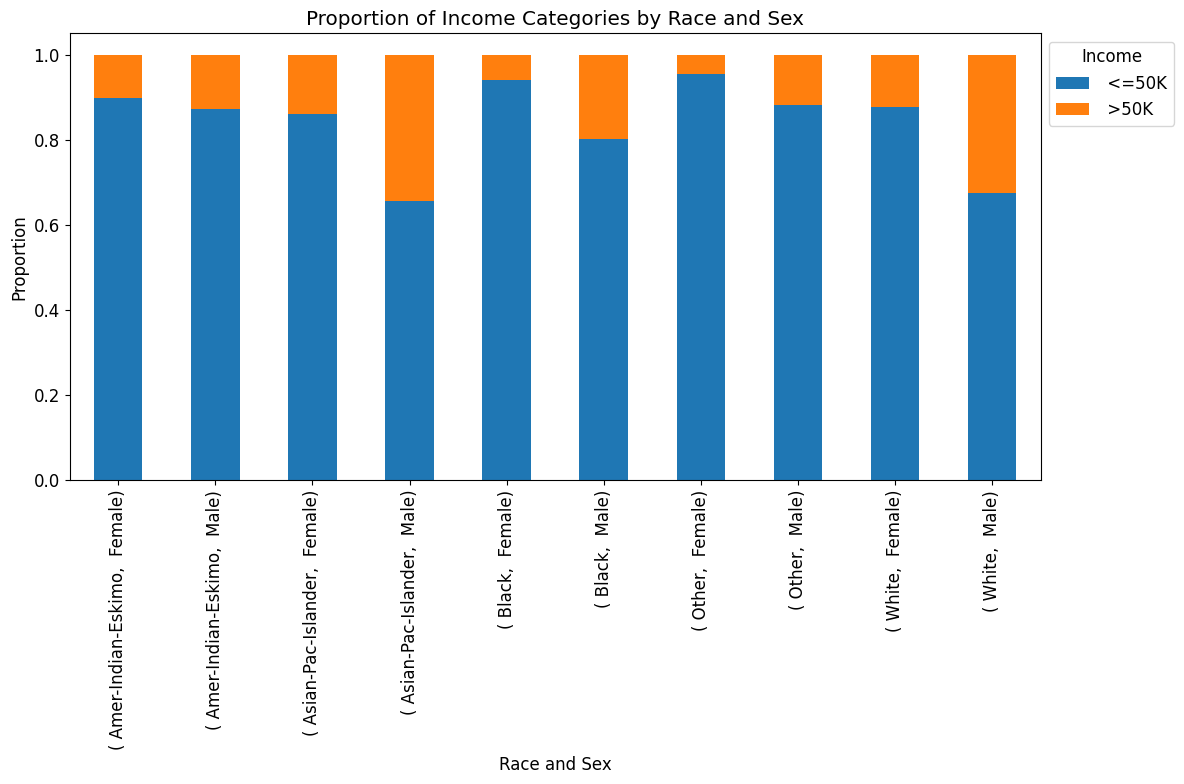

In [83]:
race_sex_income_counts = df.groupby(['race', 'sex', 'income']).size().unstack().fillna(0)

# Normalizing to show proportions
race_sex_income_props = race_sex_income_counts.div(race_sex_income_counts.sum(axis=1), axis=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
race_sex_income_props.plot(kind='bar', stacked=True, ax=ax)
plt.title('Proportion of Income Categories by Race and Sex')
plt.xlabel('Race and Sex')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(title='Income', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### User Story 6 (Multivariate)
#### Age, Relationship Vs. Income

<IPython.core.display.Javascript object>

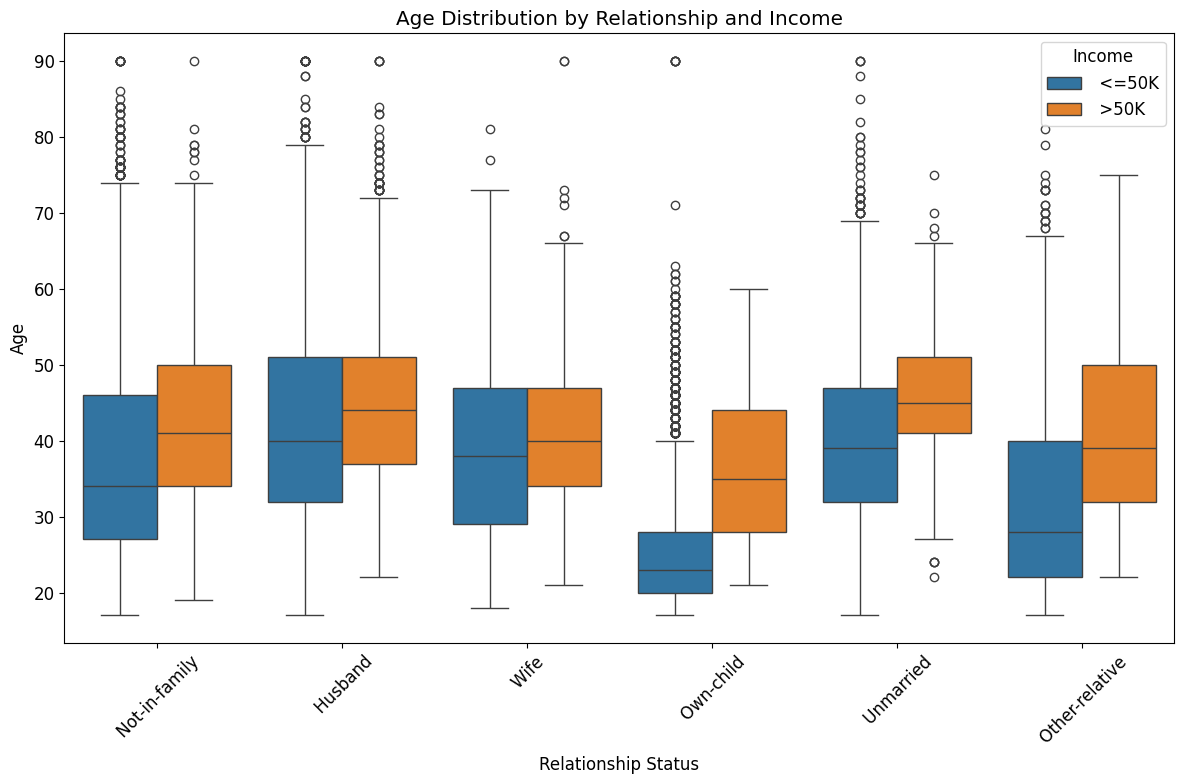

In [93]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='relationship', y='age', hue='income', data=df)
plt.title('Age Distribution by Relationship and Income')
plt.xlabel('Relationship Status')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.legend(title='Income', loc='upper right')
plt.tight_layout()
plt.show()

### User Story 7 (Univariate)
#### Education Vs. Income

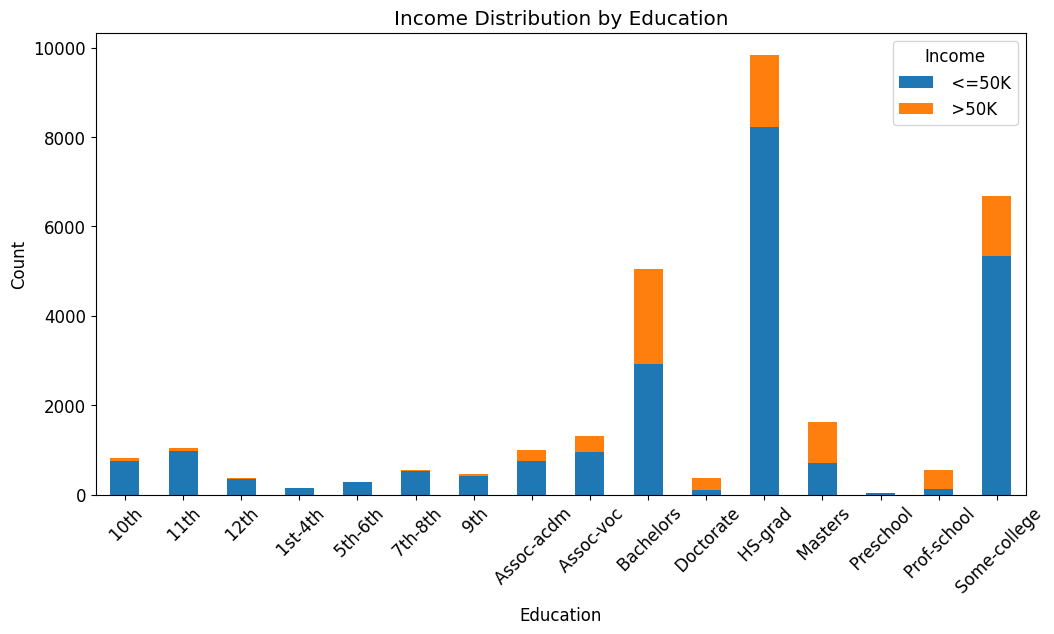

In [103]:
# Counting the occurrences of each education level for each income category
education_counts = df.groupby(['education', 'income']).size().unstack()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
education_counts.plot(kind='bar', stacked=True, ax=ax)
plt.xticks(rotation=45)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Income Distribution by Education')
plt.legend(title='Income')
plt.show()